In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv(r"..\Datasets\AusGas.csv")
df.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


### Augmented Dickey Fuller

In [17]:
result = adfuller(df['GasProd'], maxlag=10)

print("P-value: ", result[1])
if result[1] < 0.05:
    print('Time series is Stationary')
else:
    print('Time series is NOT Stationary')


P-value:  0.9981674130928889
Time series is NOT Stationary


In [18]:
df = pd.read_csv(r"..\Datasets\AirPassengers.csv")
df.head()

result = adfuller(df['Passengers'], maxlag=10)

print("P-value: ", result[1])
if result[1] < 0.05:
    print('Air Time series is Stationary')
else:
    print('Air Time series is NOT Stationary')


P-value:  0.998969450186538
Air Time series is NOT Stationary


In [19]:
df = pd.read_csv(r"..\Datasets\FMAC-HPI_24420.csv")
df.head()

result1 = adfuller(df['NSA Value'], maxlag=10)
result2 = adfuller(df['SA Value'], maxlag=10)

print("P-value: ", result1[1])
if result1[1] < 0.05:
    print('NSA Time series is Stationary')
else:
    print('NSA Time series is NOT Stationary')

print("P-value: ", result2[1])
if result2[1] < 0.05:
    print('SA Time series is Stationary')
else:
    print('SA Time series is NOT Stationary')


P-value:  0.29693588433343787
NSA Time series is NOT Stationary
P-value:  0.6628914373822401
SA Time series is NOT Stationary


In [20]:
df = pd.read_csv(r"..\Datasets\Coal Consumption.csv")
df.head()

result = adfuller(df['Amount'], maxlag=10)

print("P-value: ", result[1])
if result[1] < 0.05:
    print('Coal Time series is Stationary')
else:
    print('Coal Time series is NOT Stationary')


P-value:  0.40151826637002624
Coal Time series is NOT Stationary


#### using Diff1

In [21]:
df = pd.read_csv(r"..\Datasets\AirPassengers.csv")
df.head()

diff1 = df['Passengers'].diff(1)
diff1.dropna(inplace=True)
result = adfuller(diff1, maxlag=10)

print("P-value: ", result[1])
if result[1] < 0.05:
    print('Air Time series is Stationary')
else:
    print('Air Time series is NOT Stationary')

P-value:  8.674876853271811e-29
Air Time series is Stationary


In [22]:
df = pd.read_csv(r"..\Datasets\FMAC-HPI_24420.csv")
df.head()

diff1 = df['NSA Value'].diff(1)
diff1.dropna(inplace=True)
diff2 = df['SA Value'].diff(1)
diff2.dropna(inplace=True)
result1 = adfuller(diff1, maxlag=10)
result2 = adfuller(diff2, maxlag=10)

print("P-value: ", result1[1])
if result1[1] < 0.05:
    print('NSA Time series is Stationary')
else:
    print('NSA Time series is NOT Stationary')

print("P-value: ", result2[1])
if result2[1] < 0.05:
    print('SA Time series is Stationary')
else:
    print('SA Time series is NOT Stationary')

P-value:  0.2981388157244755
NSA Time series is NOT Stationary
P-value:  0.02548894397330389
SA Time series is Stationary


#### 2nd order diff

In [24]:
df = pd.read_csv(r"..\Datasets\FMAC-HPI_24420.csv")
df.head()

diff1 = df['NSA Value'].diff(1)
diff1.dropna(inplace=True)
diff1_1 = diff1.diff(1)
diff1_1.dropna(inplace=True)
diff2 = df['SA Value'].diff(1)
diff2.dropna(inplace=True)
result1 = adfuller(diff1_1, maxlag=10)
result2 = adfuller(diff2, maxlag=10)

print("P-value: ", result1[1])
if result1[1] < 0.05:
    print('NSA Time series is Stationary')
else:
    print('NSA Time series is NOT Stationary')

print("P-value: ", result2[1])
if result2[1] < 0.05:
    print('SA Time series is Stationary')
else:
    print('SA Time series is NOT Stationary')

P-value:  5.442541314546649e-12
NSA Time series is Stationary
P-value:  0.02548894397330389
SA Time series is Stationary


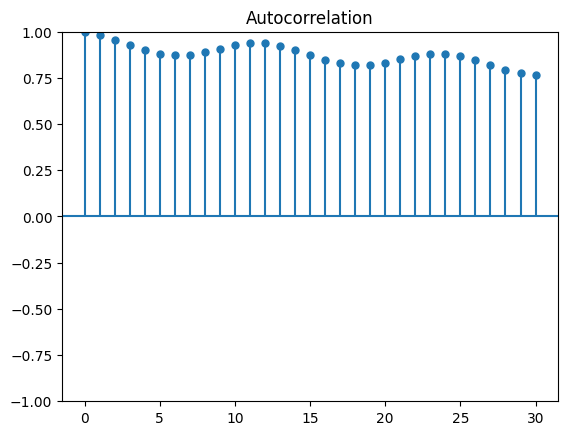

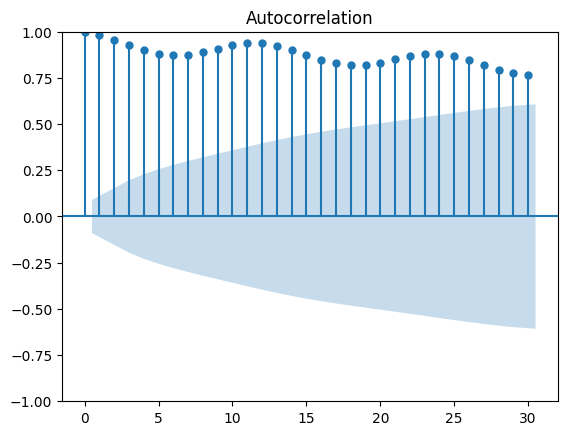

[1.         0.98294885 0.95761576 0.92792542 0.90081847 0.88146047
 0.87128665 0.87522333 0.88870577 0.90822457 0.92626498 0.93799758
 0.93920157 0.92351445 0.89989017 0.87279203 0.84679582 0.82794297
 0.81723688 0.82036507 0.83284475 0.85012788 0.867047   0.87885911
 0.8807906  0.86810536 0.84550242]


In [27]:
df = pd.read_csv(r"..\Datasets\AusGas.csv")

plot_acf(df['GasProd'], lags=30, alpha=None)
plt.show()

plot_acf(df['GasProd'], lags=30)
plt.show()

acf_vals = sm.tsa.acf(df['GasProd'])
print(acf_vals)

result = adfuller(df['GasProd'], maxlag=10)

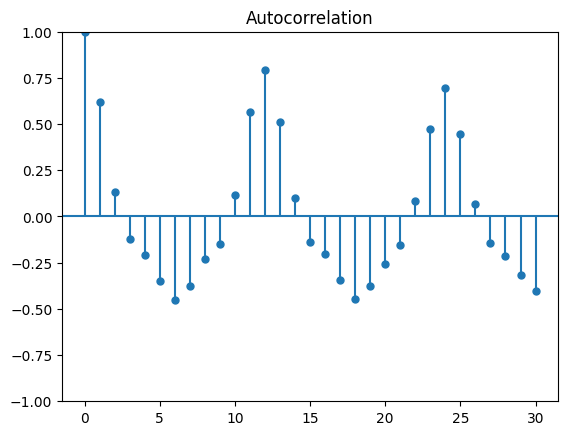

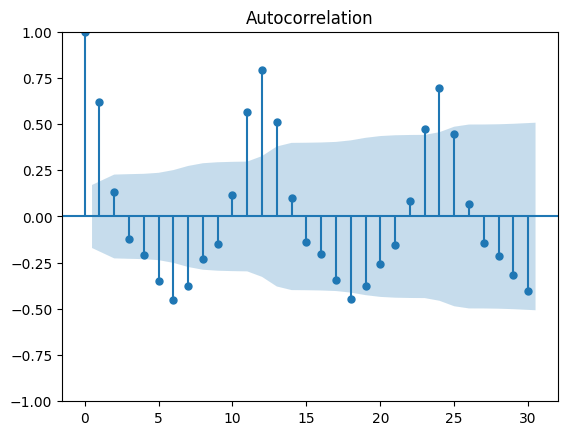

[ 1.          0.61912046  0.13466818 -0.12075    -0.2079672  -0.35033973
 -0.44926524 -0.3781694  -0.23055816 -0.15045781  0.11724346  0.56441293
  0.79421206  0.51028822  0.10071206 -0.13863182 -0.20494297 -0.34144711
 -0.44608178 -0.37506615 -0.25449282 -0.15463096]


In [28]:
df = pd.read_csv(r"..\Datasets\Coal Consumption.csv")

plot_acf(df['Amount'], lags=30, alpha=None)
plt.show()

plot_acf(df['Amount'], lags=30)
plt.show()

acf_vals = sm.tsa.acf(df['Amount'])
print(acf_vals)

result = adfuller(df['Amount'], maxlag=10)